In [1]:
import numpy as np
import random
import json
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

In [2]:
labels = pd.read_csv('labels.csv')
num = len(labels)
labels = labels.iloc[: , 1:]
labels

,lables
0,0
1,0
2,0
3,0
4,0
...,...
12640,0
12641,1
12642,1
12643,1


In [3]:
path = 'imcrop/'
imgs = []
for i in range(num):
    img = cv.imread(path + "t{}.jpg".format(i))
    imgs.append(img)

12645

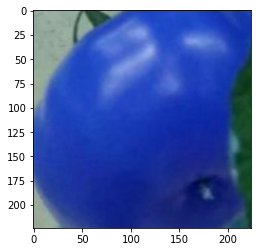

In [4]:
rand = random.randint(0,num)
img_show = imgs[rand]
plt.imshow(img_show)
len(imgs)



In [5]:
X_train, X_test , y_train, y_test = train_test_split(np.array(imgs),np.array(labels),test_size=0.10)

In [6]:
print((np.array(labels)).shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
(np.array(imgs)).shape


(12645, 1)
(11380, 224, 224, 3)
(1265, 224, 224, 3)
(11380, 1)
(1265, 1)


(12645, 224, 224, 3)

In [7]:
resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape=(224,224,3), pooling = 'max')

In [8]:
for layers in (resnet.layers)[:30]:
    print(layers)
    layers.trainable = False

In [9]:
model = Sequential()
from keras import regularizers

In [10]:
model.add(resnet)
model.add(Flatten())
model.add(Dense(32,activation= tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1,activation= tf.nn.sigmoid))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [13]:
BATCH_SIZE = 64
train_generator= datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)


In [14]:
batch_size = 32

In [15]:
X_train.shape

(11380, 224, 224, 3)

In [27]:


# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint('tomato_classifier_model.h5', verbose=1,
                                                save_best_only=True)



In [28]:
EPOCHS = 20



In [33]:
model.fit_generator(train_generator, validation_data= (X_test, y_test),steps_per_epoch=BATCH_SIZE ,epochs=EPOCHS,callbacks=[checkpoint])




Epoch 1/20
64/64 [==============================] - 57s 875ms/step - loss: 0.4116 - accuracy: 0.9141 - val_loss: 0.4579 - val_accuracy: 0.8625

Epoch 00001: val_loss improved from 0.49170 to 0.45786, saving model to tomato_classifier_model.h5
Epoch 2/20
64/64 [==============================] - 58s 900ms/step - loss: 0.3887 - accuracy: 0.9153 - val_loss: 0.4258 - val_accuracy: 0.8957

Epoch 00002: val_loss improved from 0.45786 to 0.42578, saving model to tomato_classifier_model.h5
Epoch 3/20
64/64 [==============================] - 59s 910ms/step - loss: 0.3423 - accuracy: 0.9260 - val_loss: 0.4949 - val_accuracy: 0.9249

Epoch 00003: val_loss did not improve from 0.42578
Epoch 4/20
64/64 [==============================] - 58s 905ms/step - loss: 0.3251 - accuracy: 0.9272 - val_loss: 0.4453 - val_accuracy: 0.7945

Epoch 00004: val_loss did not improve from 0.42578
Epoch 5/20
64/64 [==============================] - 58s 902ms/step - loss: 0.2957 - accuracy: 0.9309 - val_loss: 0.4241 - va

In [34]:
model.save_weights('model_weights.h5')
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.91%


In [35]:
new_model = keras.models.load_model("tomato_classifier_model.h5")

In [43]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.91%
